In [2]:
!pip install visual_kinematics

inverse is successful: True
axis values: 
[ 5.62351808e-16  1.19980364e+00 -1.19794834e+00 -1.85530806e-03]


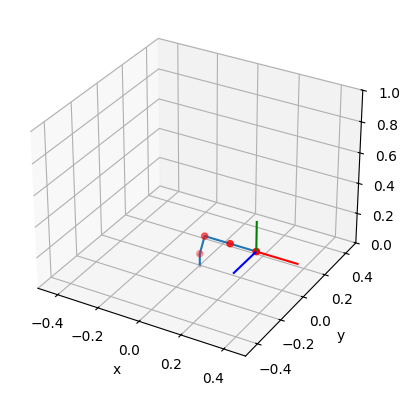

In [3]:
import numpy as np
import math
from visual_kinematics.RobotSerial import *

# 역탄젠트 계산/ 호도법
temp = math.atan2(0.024, 0.128)

# d, a, alpha, theta
dh_params = np.array([[0.077, 0.000, 0.5*pi, 0.],
                      [0.000, 0.130, 0.0000, 0+temp],
                      [0.000, 0.124, 0.0000, 0-temp],
                      [0.000, 0.126, 0.0000, 0.]])
robot = RobotSerial(dh_params)

# 엔드이펙터 목표 위치
xyz = np.array([[0.274], [0.], [0.205]])
# 엔드이펙터 목표 자세 [roll, pitch, yaw]
abc = np.array([0. , 0. , 0.])
end = Frame.from_euler_3(abc, xyz)

# Inverse Kinematics 계산
robot.inverse(end)

print("inverse is successful: {0}".format(robot.is_reachable_inverse))
print("axis values: \n{0}".format(robot.axis_values))
robot.show()

In [5]:
!pip install ikpy

(0.0, 0.5)

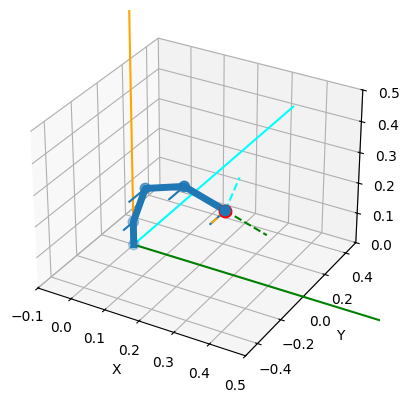

In [7]:
import ikpy.chain
import ikpy.utils.plot as plot_utils
import matplotlib.pyplot as plt

my_chain = ikpy.chain.Chain.from_urdf_file("/content/openmanipulator_sub.URDF")
target_position = [0.274, 0., 0.205]

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)

ax.set_xlim(-0.1, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.5)